# Model Evaluation and Cross Validation

## Model Evaluation Metrics for Regression and Classification

### Model Evaluation for Regression
#### Mean Squared Error(MSE)
- Measures the average squared difference between predicted and actual data.
- Sensitive to outliers due to squaring of errors.
#### Mean Absolute Error(MAE)
- Measures the average absolute difference between predicted and actual data.
- Provides a more interpretable measure but less but less sensitive to outliers.
#### Root Mean Squared Error(RMSE)
- Square root of MSE, providing errors in the same units as the target variable.

### Model Evaluation for Classification
#### Accuracy
- Proportion of correctly predicted instances.
- Useful when the dataset is balanced.
#### Precision
- Fraction of Positive predictions that are correct.
- Important for applications like fraud detection, where false positives are costly.
#### Recall(Sensitivity)
- Fraction of actual postives that arre correctly identified
- Useful in cases where missing positive instances is critical.

<img src="img/metrics_for_classification.png" width=400>

#### F1 Score
- Harmonic mean of precision and recall.
- Balances precision and recall, especially useful for imbalanced datasets.

## Introduction to Cross-Validation
### Key Cross-Validation Techniques
**K-Fold Cross-Validation**
- Splits the dataset into K equal parts
- Trains the model on K − 1 folds and tests on the remaining fold, repeating the process & times
- The average of the K test scores provides the final evaluation metric

**Stratified K-Fold**
- Ensures each fold has a proportional representation of classes in classification problems

**Leave-One-Out Cross-Validation**
- Trains the model on n − 1 samples and tests on the remaining one. Repeated for all samples
- Computationally expensive for large datasets
### Advantages
- Reduces the risk of overfitting by testing on multiple subsets of data
- Provides a more generalized evaluation of model performance.

## Understanding the Confusion Matrix
The confusion matrix is a table that summarizes the performance of a classification model by comparing predicted and actual values.

<img src="img/confusion_matrix.png" width=400>

In [11]:
# Cross Validation
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

data = load_iris()
X, y = data.data, data.target

model = RandomForestClassifier(random_state=42)

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring="accuracy")

print("Cross-Validation Scores: ", cv_scores)
print("Mean Accuracy: ", cv_scores.mean())

Cross-Validation Scores:  [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Mean Accuracy:  0.9600000000000002


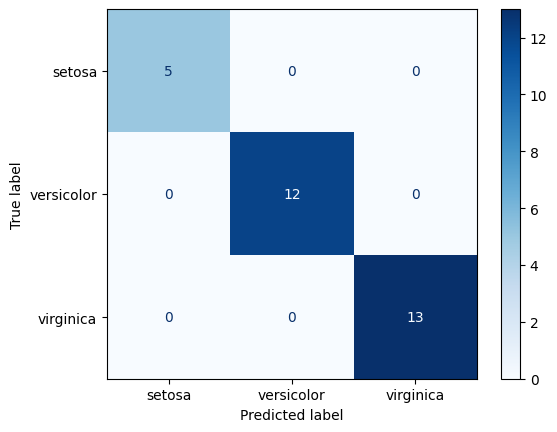


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [19]:
# Generating Confusion Matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

# Confusing Matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap="Blues")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))